## Importation des données 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import seaborn as sns
import datetime 
import calendar

In [ ]:
crimes = pd.read_csv("/content/drive/MyDrive/NYPD_Complaint_Data_Historic.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983207 entries, 0 to 6983206
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

## Data cleaning 

Dealing with NaN data and unused columns


In [ ]:
(crimes.isna().sum()/crimes.shape[0]*100).sort_values(ascending=False)
#on va supprimer les cols avec pourcentage superieure à 60% de lignes vides
#on va supprimer les cols qui correspondent au personne Suspecte

PARKS_NM             99.641311
STATION_NAME         97.750546
TRANSIT_DISTRICT     97.750546
HADEVELOPT           95.044855
HOUSING_PSA          92.311427
SUSP_AGE_GROUP       67.412766
SUSP_SEX             49.724231
SUSP_RACE            47.815166
CMPLNT_TO_DT         23.891258
CMPLNT_TO_TM         23.826145
VIC_AGE_GROUP        23.462630
LOC_OF_OCCUR_DESC    21.193586
PREM_TYP_DESC         0.568965
Y_COORD_CD            0.344598
Latitude              0.344598
Longitude             0.344598
Lat_Lon               0.344598
X_COORD_CD            0.344598
OFNS_DESC             0.269575
BORO_NM               0.156003
PATROL_BORO           0.090531
PD_DESC               0.083987
PD_CD                 0.083987
JURISDICTION_CODE     0.083987
ADDR_PCT_CD           0.031017
CMPLNT_FR_DT          0.009380
VIC_RACE              0.004411
VIC_SEX               0.004396
CMPLNT_FR_TM          0.000687
CRM_ATPT_CPTD_CD      0.000100
RPT_DT                0.000000
KY_CD                 0.000000
LAW_CAT_

In [ ]:
df=crimes
df=reduce_mem_usage(df)

Memory usage after optimization is: 1505.09 MB
Decreased by 19.3%


In [ ]:
#dropping rows with NaN values
df.dropna(subset=['PATROL_BORO','ADDR_PCT_CD','Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['PD_CD','PD_DESC','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'PATROL_BORO' with UNKNOWN
df.fillna({'PATROL_BORO':'UNKNOWN'}, inplace=True)
print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)

Clean dataset: 
Observations:  6929268
Variables:  21


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,09/04/2014,17:25:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,OPPOSITE OF,N.Y. POLICE DEPT,1005945.0,188862.0,40.68750,-73.9375,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,121.0,10/12/2016,109,GRAND LARCENY,COMPLETED,FELONY,STATEN ISLAND,UNKNOWN,N.Y. POLICE DEPT,947034.0,171375.0,40.62500,-74.1250,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,41.0,10/19/2012,109,GRAND LARCENY,COMPLETED,FELONY,BRONX,FRONT OF,N.Y. POLICE DEPT,1014179.0,239453.0,40.81250,-73.8750,"(40.823876276, -73.891862968)",PATROL BORO BRONX,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,46.0,03/24/2015,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,FRONT OF,N.Y. POLICE DEPT,1009041.0,247401.0,40.84375,-73.9375,"(40.845707148, -73.910398033)",PATROL BORO BRONX,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,N.Y. POLICE DEPT,1031779.0,217663.0,40.75000,-73.8125,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,25-44,BLACK,M


In [ ]:
df = df.drop(['Lat_Lon', 'CMPLNT_NUM'], axis = 1)

In [ ]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
#df.isna().sum()


VIC_SEX              0.0
BORO_NM              0.0
CMPLNT_FR_TM         0.0
ADDR_PCT_CD          0.0
RPT_DT               0.0
KY_CD                0.0
OFNS_DESC            0.0
CRM_ATPT_CPTD_CD     0.0
LAW_CAT_CD           0.0
LOC_OF_OCCUR_DESC    0.0
VIC_RACE             0.0
JURIS_DESC           0.0
X_COORD_CD           0.0
Y_COORD_CD           0.0
Latitude             0.0
Longitude            0.0
PATROL_BORO          0.0
VIC_AGE_GROUP        0.0
CMPLNT_FR_DT         0.0
dtype: float64

## Data structuring

In [ ]:
result_month=[]
result_year=[]
result_day=[]
for i in df['CMPLNT_FR_DT']:
    month,day,year=i.split('/')
    result_month.append(month)
    result_year.append(year)
    result_day.append(day)
df['month']=result_month
df['year']=result_year
df['day']=result_day


L=["morning","afternoon","evening","night"]
result=[]
for x in df.CMPLNT_FR_TM:
        
    times=x.split(':')
    if int(times[0])>6 and int(times[0])<=12:
        result.append(L[0])
    elif int(times[0])>12 and int(times[0])<=17:
        result.append(L[1])
    elif int(times[0])<20:
        result.append(L[2])
    else : 
        result.append(L[3])
df['time_zone']=result

time_zone_mapping ={'afternoon':2, 'morning':1, 'evening':3, 'night':4}
df['time_zone']=df['time_zone'].map(time_zone_mapping)



In [ ]:
df = df.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], axis = 1)

In [ ]:
VIC_AGE_GROUP_mapping ={'25-44':4, '45-64':2, '<18':5, '18-24':3, 'UNKNOWN':0, '65+':1}
df['VIC_AGE_GROUP']=df['VIC_AGE_GROUP'].map(VIC_AGE_GROUP_mapping)

In [ ]:
all_crimes = ["assualt","grand larency","petit larency",
        "harrasment","exposed to weapons","criminal crimes","public safty crimes","administrative crimes","vehical crimes",
        "drugs and alcaholic crimes","theif and robbery ","kidnapping","frauds","children crimes"]
df_mapping ={#assualt
           'ASSAULT 3 & RELATED OFFENSES':0,'FELONY ASSAULT':0,'OFFENSES AGAINST THE PERSON':0,
             #grand larency
             'GRAND LARCENY':1, 
             #petit larency
             'PETIT LARCENY':2,'PETIT LARCENY OF MOTOR VEHICLE':2,
             #harrasment
            'HARRASSMENT 2':3,
            #sex crime
           'SEX CRIMES':4,'RAPE':4,'PROSTITUTION & RELATED OFFENSES':4,
             #exposed to weapons
            'DANGEROUS WEAPONS':5, 'BURGLARY':5,
             #criminal crimes
       'CRIMINAL MISCHIEF & RELATED OF':7,'CRIMINAL TRESPASS':7,
        #public safty crimes
       'OFF. AGNST PUB ORD SENSBLTY &':9, 'OFFENSES AGAINST PUBLIC SAFETY':9, 'LEWDNESS,PUBLIC':9, 'ARSON':9,'JOSTLING':9, 
        #administrative crimes
       'MISCELLANEOUS PENAL LAW':11, 'OFFENSES AGAINST PUBLIC ADMINI':11,  'ADMINISTRATIVE CODE':11,
        #vehical crimes     
       'VEHICLE AND TRAFFIC LAWS':13, 'DISORDERLY CONDUCT':13,'HOMICIDE-NEGLIGENT-VEHICLE':13,'UNAUTHORIZED USE OF A VEHICLE':13,'GRAND LARCENY OF MOTOR VEHICLE':13, 'INTOXICATED & IMPAIRED DRIVING':13, 
        #drugs and alcaholic crimes 
        'DANGEROUS DRUGS':16,'ALCOHOLIC BEVERAGE CONTROL LAW':16,
        #theif and robbery
       'OTHER OFFENSES RELATED TO THEF':17,'THEFT-FRAUD':17,'THEFT OF SERVICES':17, 'ROBBERY':17,'POSSESSION OF STOLEN PROPERTY':17,"BURGLAR'S TOOLS":17,
       #kidnapping
       'KIDNAPPING & RELATED OFFENSES':27,
        #frauds
       'FORGERY':30,'FRAUDULENT ACCOSTING':30, 'FRAUDS':30,'OFFENSES INVOLVING FRAUD':30,
         #childern crimes
        'OFFENSES RELATED TO CHILDREN':37,'CHILD ABANDONMENT/NON SUPPORT':37,
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED':41,'OTHER STATE LAWS (NON PENAL LA':36,'NYS LAWS-UNCLASSIFIED FELONY':29,'FALSE REPORT UNCLASSIFIED':47,'HOMICIDE-NEGLIGENT,UNCLASSIFIE':52, 'THEFT OF SERVICES, UNCLASSIFIE':54,'LOITERING':43, 'OTHER STATE LAWS':55,'NOISE,UNECESSARY':49, 'TAX LAW':50, 'NYS LAWS-UNCLASSIFIED VIOLATION':51,'ENDAN WELFARE INCOMP':45,'GAMBLING':35}

df['OFNS_DESC']=df['OFNS_DESC'].map(df_mapping)
df = df[df.OFNS_DESC != 43]
df = df[df.OFNS_DESC != 48]
df = df[df.OFNS_DESC != 49]
df = df[df.OFNS_DESC != 50]
df = df[df.OFNS_DESC != 55]
df = df[df.OFNS_DESC != 52]
df = df[df.OFNS_DESC != 54]
df = df[df.OFNS_DESC != 41]
df = df[df.OFNS_DESC != 51]
df = df[df.OFNS_DESC != 36]
df = df[df.OFNS_DESC != 45]
df = df[df.OFNS_DESC != 47]
df = df[df.OFNS_DESC != 29]
df = df[df.OFNS_DESC != 35]

In [ ]:
df1=df
df1 = reduce_mem_usage(df1)

In [ ]:
df1 = df1.drop(['CRM_ATPT_CPTD_CD'], axis = 1)

In [ ]:
df1 = pd.get_dummies(df1,columns=['VIC_SEX'])
df1 = pd.get_dummies(df1,columns=['VIC_RACE'])
df1 = pd.get_dummies(df1,columns=['PATROL_BORO'])
df1 = pd.get_dummies(df1,columns=['BORO_NM'])

In [ ]:
df1 = pd.get_dummies(df1,columns=['LOC_OF_OCCUR_DESC'])
df1 = df1.drop(['X_COORD_CD','Y_COORD_CD','JURIS_DESC'], axis = 1)

In [ ]:
df1.to_csv('/content/drive/MyDrive/crimes.csv', index = False)

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/crimes.csv")
df1 = reduce_mem_usage(df1)

Memory usage after optimization is: 593.18 MB
Decreased by 73.2%


In [ ]:
neg_outliers=df1['ADDR_PCT_CD']<=0
df1[neg_outliers] = np.nan
df1.dropna(subset=['ADDR_PCT_CD'],axis=0,inplace=True)

In [ ]:
df1 = df1.drop(['RPT_DT'], axis = 1)

In [ ]:
df1.to_csv('/content/drive/MyDrive/crimes.csv', index = False)

## Train model

In [4]:
f=['ADDR_PCT_CD',
 'Latitude',
 'Longitude',
 'VIC_AGE_GROUP',
 'month',
 'year',
 'day',
 'time_zone',
 'VIC_SEX_D',
 'VIC_SEX_E',
 'VIC_SEX_F',
 'VIC_SEX_M',
 'VIC_SEX_UNKNOWN',
 'VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE',
 'VIC_RACE_ASIAN / PACIFIC ISLANDER',
 'VIC_RACE_BLACK',
 'VIC_RACE_BLACK HISPANIC',
 'VIC_RACE_OTHER',
 'VIC_RACE_UNKNOWN',
 'VIC_RACE_WHITE',
 'VIC_RACE_WHITE HISPANIC',
 'PATROL_BORO_PATROL BORO BKLYN NORTH',
 'PATROL_BORO_PATROL BORO BKLYN SOUTH',
 'PATROL_BORO_PATROL BORO BRONX',
 'PATROL_BORO_PATROL BORO MAN NORTH',
 'PATROL_BORO_PATROL BORO MAN SOUTH',
 'PATROL_BORO_PATROL BORO QUEENS NORTH',
 'PATROL_BORO_PATROL BORO QUEENS SOUTH',
 'PATROL_BORO_PATROL BORO STATEN ISLAND',
 'BORO_NM_BRONX',
 'BORO_NM_BROOKLYN',
 'BORO_NM_MANHATTAN',
 'BORO_NM_QUEENS',
 'BORO_NM_STATEN ISLAND',
 'LOC_OF_OCCUR_DESC_FRONT OF',
 'LOC_OF_OCCUR_DESC_INSIDE',
 'LOC_OF_OCCUR_DESC_OPPOSITE OF',
 'LOC_OF_OCCUR_DESC_REAR OF',
 'LOC_OF_OCCUR_DESC_BEHIND',
 'LOC_OF_OCCUR_DESC_UNKNOWN']

In [ ]:
#df.VIC_AGE_GROUP.value_counts()

In [6]:
df1.dropna()
df1 = df1.fillna(df1.median())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911059 entries, 0 to 6911808
Data columns (total 41 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   ADDR_PCT_CD                              float64
 1   KY_CD                                    float64
 2   OFNS_DESC                                float64
 3   Latitude                                 float64
 4   Longitude                                float64
 5   VIC_AGE_GROUP                            float64
 6   month                                    float64
 7   year                                     float64
 8   day                                      float64
 9   time_zone                                float64
 10  VIC_SEX_D                                float64
 11  VIC_SEX_E                                float64
 12  VIC_SEX_F                                float64
 13  VIC_SEX_M                                float64
 14  VIC_SEX_UNKNOWN   

In [ ]:
df1.head()

,ADDR_PCT_CD,KY_CD,LAW_CAT_CD,Latitude,Longitude,VIC_AGE_GROUP,month,year,day,time_zone,VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M,VIC_SEX_UNKNOWN,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,PATROL_BORO_PATROL BORO BKLYN NORTH,PATROL_BORO_PATROL BORO BKLYN SOUTH,PATROL_BORO_PATROL BORO BRONX,PATROL_BORO_PATROL BORO MAN NORTH,PATROL_BORO_PATROL BORO MAN SOUTH,PATROL_BORO_PATROL BORO QUEENS NORTH,PATROL_BORO_PATROL BORO QUEENS SOUTH,PATROL_BORO_PATROL BORO STATEN ISLAND,BORO_NM_BRONX,BORO_NM_BROOKLYN,BORO_NM_MANHATTAN,BORO_NM_QUEENS,BORO_NM_STATEN ISLAND,LOC_OF_OCCUR_DESC_FRONT OF,LOC_OF_OCCUR_DESC_INSIDE,LOC_OF_OCCUR_DESC_OPPOSITE OF,LOC_OF_OCCUR_DESC_REAR OF,LOC_OF_OCCUR_DESC_UNKNOWN
0,81.0,344.0,2,40.685041,-73.921777,4.0,9.0,2014.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,121.0,109.0,3,40.636991,-74.134093,2.0,10.0,2016.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41.0,109.0,3,40.823876,-73.891863,2.0,9.0,2012.0,28.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,46.0,341.0,2,40.845707,-73.910398,5.0,3.0,2015.0,24.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,109.0,344.0,2,40.763992,-73.828426,4.0,5.0,2017.0,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

#Split dataset to Training Set & Test Set
x, y = train_test_split(df1, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

Target= ['OFNS_DESC']

x1 = x[f]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[f]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', f)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)


# Random Forest
# Create Model with configuration
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


rf_model =RandomForestClassifier(n_estimators=30, # Number of trees
                                  min_samples_split = 20,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)


# Model Training
rf_model.fit(X=x1,y=x2.values.ravel())

# Prediction
result = rf_model.predict(y[f])


from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
# Model Evaluation
ac_sc = accuracy_score(y2.values.ravel(), result)
rc_sc = recall_score(y2.values.ravel(), result, average="weighted")
pr_sc = precision_score(y2.values.ravel(), result, average="weighted")
f1_sc = f1_score(y2.values.ravel(), result, average='micro')
confusion_m = confusion_matrix(y2.values.ravel(), result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)


Feature Set Used    :  ['ADDR_PCT_CD', 'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'month', 'year', 'day', 'time_zone', 'VIC_SEX_D', 'VIC_SEX_E', 'VIC_SEX_F', 'VIC_SEX_M', 'VIC_SEX_UNKNOWN', 'VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE', 'VIC_RACE_ASIAN / PACIFIC ISLANDER', 'VIC_RACE_BLACK', 'VIC_RACE_BLACK HISPANIC', 'VIC_RACE_OTHER', 'VIC_RACE_UNKNOWN', 'VIC_RACE_WHITE', 'VIC_RACE_WHITE HISPANIC', 'PATROL_BORO_PATROL BORO BKLYN NORTH', 'PATROL_BORO_PATROL BORO BKLYN SOUTH', 'PATROL_BORO_PATROL BORO BRONX', 'PATROL_BORO_PATROL BORO MAN NORTH', 'PATROL_BORO_PATROL BORO MAN SOUTH', 'PATROL_BORO_PATROL BORO QUEENS NORTH', 'PATROL_BORO_PATROL BORO QUEENS SOUTH', 'PATROL_BORO_PATROL BORO STATEN ISLAND', 'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND', 'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF', 'LOC_OF_OCCUR_DESC_BEHIND', 'LOC_OF_OCCUR_DESC_UNKNOWN']
Target Class       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.9060940000520904
Recall      :  0.9060940000520904
Precision   :  0.9077867474329682
F1 Score    :  0.9060940000520904
Confusion Matrix: 
[[191543   2792   1044      3    526   1008   1098     98    668    413
    1517    180      0    582      2]
 [  4033 115860    314      0    174     36     82      0      4    362
     171      8      0    142      0]
 [   294      0 231212      0     20    106     20      0      8    238
      13     12      0     25      0]
 [    16      1     17 174989      2     23     37      5    350      7
      17      3      0      8      0]
 [  3572   1494   1897      0  11361    227    147      2   1297    152
     326    576      0     29      0]
 [  3713   3133    506      0    166  66952    320      0    292    400
    3321    159      0     21      0]
 [  3823   2342   2180      0    120    326 141459     34    757   2505
    1481    224      0     33      0]
 [   372    250    343      3  

In [ ]:
import joblib
joblib.dump(rf_model, "/content/drive/MyDrive/rf_model.h5")


['/content/drive/MyDrive/rf_model.h5']

In [ ]:
model = joblib.load("/content/drive/MyDrive/rf_model.h5")


In [ ]:
a=y[f].iloc[[1,2]]
result = model.predict_proba(a)

In [ ]:
result

array([[4.77162413e-02, 2.21079652e-02, 1.87192044e-02, 7.17846897e-03,
        6.29678697e-03, 1.50922936e-02, 1.09652815e-02, 8.36158841e-01,
        2.65091301e-02, 1.08680366e-03, 3.15941986e-05, 6.54937140e-03,
        6.60009373e-05, 1.51801222e-03, 4.00438897e-06],
       [1.45730261e-01, 2.09484313e-01, 4.35914484e-02, 8.36702408e-03,
        1.12518834e-02, 4.59933073e-01, 1.77615754e-02, 9.43476792e-03,
        4.13986425e-02, 2.73510082e-04, 2.27626212e-05, 3.67822992e-02,
        4.15839806e-05, 1.59216707e-02, 5.18483953e-06]])

In [ ]:
#df1.to_csv('/content/drive/MyDrive/crimes.csv', index = False)

Text(0.5, 1.0, 'Random forest')

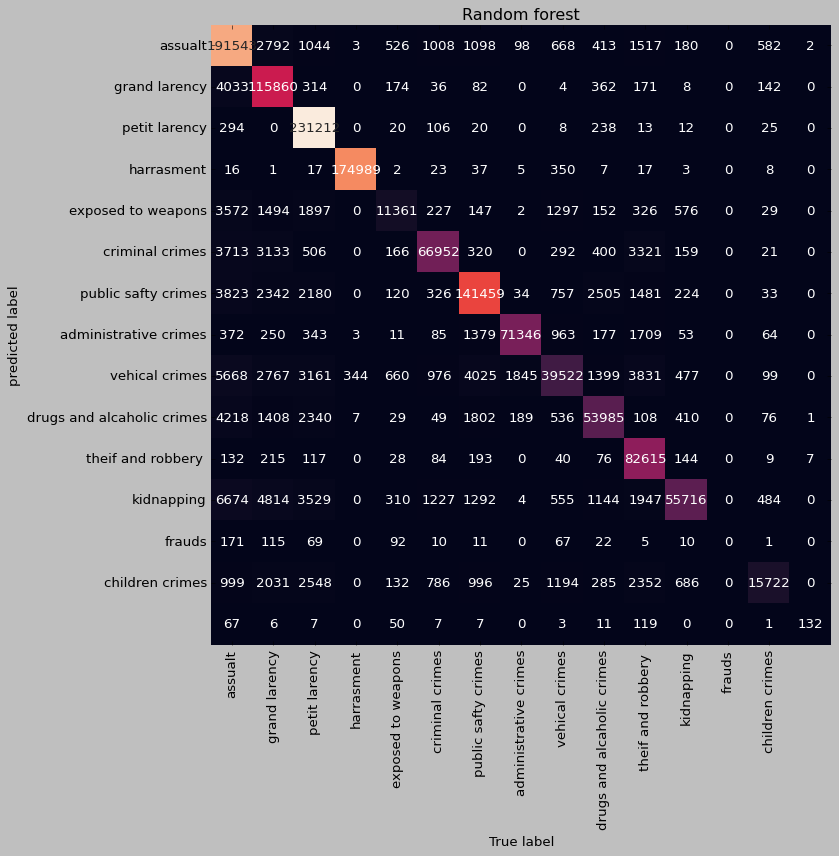

In [ ]:
import seaborn as sns
confusion_m = confusion_matrix(y2.values.ravel(), rf_model.predict(y[f]))

plt.figure(figsize=(10,10))

sns.heatmap(confusion_m, square=True, annot=True, fmt='d', cbar=False,xticklabels=all_crimes,yticklabels=all_crimes)
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.title('Random forest')

In [7]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [16]:
accuracy_lst=[]
algo_lst=['Random Forest','Logistic Regression','Decision Trees']

In [9]:
from sklearn.model_selection import train_test_split

#Split dataset to Training Set & Test Set
x, y = train_test_split(df1, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

Target= ['OFNS_DESC']

x1 = x[f]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[f]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', f)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)


# Random Forest
# Create Model with configuration
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


rf_model =RandomForestClassifier(n_estimators=30, # Number of trees
                                  min_samples_split = 20,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)


# Model Training
rf_model.fit(X=x1,y=x2.values.ravel())

# Prediction
result = rf_model.predict(y[f])
ac_sc = accuracy_score(y2.values.ravel(), result)
accuracy_lst.append(ac_sc)


Feature Set Used    :  ['ADDR_PCT_CD', 'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'month', 'year', 'day', 'time_zone', 'VIC_SEX_D', 'VIC_SEX_E', 'VIC_SEX_F', 'VIC_SEX_M', 'VIC_SEX_UNKNOWN', 'VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE', 'VIC_RACE_ASIAN / PACIFIC ISLANDER', 'VIC_RACE_BLACK', 'VIC_RACE_BLACK HISPANIC', 'VIC_RACE_OTHER', 'VIC_RACE_UNKNOWN', 'VIC_RACE_WHITE', 'VIC_RACE_WHITE HISPANIC', 'PATROL_BORO_PATROL BORO BKLYN NORTH', 'PATROL_BORO_PATROL BORO BKLYN SOUTH', 'PATROL_BORO_PATROL BORO BRONX', 'PATROL_BORO_PATROL BORO MAN NORTH', 'PATROL_BORO_PATROL BORO MAN SOUTH', 'PATROL_BORO_PATROL BORO QUEENS NORTH', 'PATROL_BORO_PATROL BORO QUEENS SOUTH', 'PATROL_BORO_PATROL BORO STATEN ISLAND', 'BORO_NM_BRONX', 'BORO_NM_BROOKLYN', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'BORO_NM_STATEN ISLAND', 'LOC_OF_OCCUR_DESC_FRONT OF', 'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF', 'LOC_OF_OCCUR_DESC_BEHIND', 'LOC_OF_OCCUR_DESC_UNKNOWN']
Target Class       

In [10]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X=x1,y=x2.values.ravel())
y_pred=lr.predict(y[f])

# Get the accuracy score
acc_lr=accuracy_score(y2.values.ravel(), y_pred)

# Append to the accuracy list
accuracy_lst.append(acc_lr)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc_lr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[Logistic regression algorithm] accuracy_score: 0.380.


In [15]:
# Decision tree algorithm


dt_gini = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)
dt_gini.fit(X=x1,y=x2.values.ravel())
y_pred= dt_gini.predict(y[f])
accuracy_gini = accuracy_score(y2.values.ravel(), y_pred)
accuracy_lst.append(accuracy_gini)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.963.
[Decision Tree -- gini] accuracy_score: 0.889.


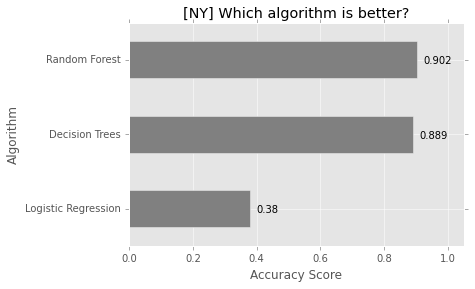

In [20]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)


# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),3)), fontsize=10)

# Set the limit, lables, ticks and title
state='NY'
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] Which algorithm is better?'.format(state))

plt.show()